In [1]:
import cv2
import os
import shutil
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
#original image
path_image = '/root/userspace/project/image/'
path_image_bottom = '/root/userspace/project/image_bottom/'
path_image_top = '/root/userspace/project/image_top/'
path_image_bottom_np = '/root/userspace/project/image_bottom_np/'
path_image_top_np = '/root/userspace/project/image_top_np/'

In [3]:
#cropped image size
height = 100
width = 100

In [7]:
#load model
face_classifier = cv2.CascadeClassifier('/root/userspace/project/haarcascade_frontalface_default.xml')
eye_classifier = cv2.CascadeClassifier('/root/userspace/project/haarcascade_eye.xml')

In [53]:
# crop face from image
# TODO: grayscale to align the pictures (for better calibration)
def facecrop(image, save=True):

    img = cv2.imread('{}{}'.format(path_to_image, image))
    faces = face_classifier.detectMultiScale(img, 1.3, 5)
    #     cv2.imwrite('data/dst/opencv_face_detect_rectangle.jpg', src)
    
    if faces != None:
        for x, y, w, h in faces:
            #cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)
            image_face = img[y: y + h, x: x + w]
            eyes = eye_cascade.detectMultiScale(image_face)
        plt.imshow(image_face)

        #if save == True:
        #   cv2.imwrite('./cropped/{}'.format(image), image_face)

In [7]:
save=True

In [8]:
image_list = os.listdir(path_to_image)

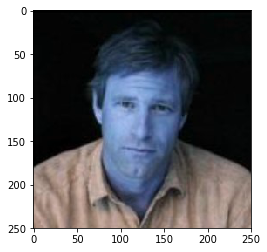

In [25]:
filename="/root/userspace/project/image/Aaron_Eckhart_0001.jpg"
img = cv2.imread(filename)
plt.imshow(img)

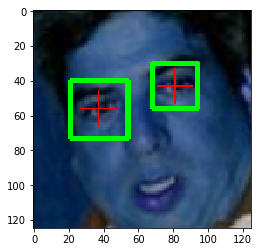

In [42]:
folderpath="/root/userspace/project/image/"
#name="Abdoulaye_Wade_0003.jpg"
#name="/Aaron_Eckhart_0001.jpg"
name="Aaron_Pena_0001.jpg"
filename=folderpath+name
img = cv2.imread(filename)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_classifier.detectMultiScale(img_gray)
#     cv2.imwrite('data/dst/opencv_face_detect_rectangle.jpg', src)

centers=[]
if faces.size != 0:
    for x, y, w, h in faces:
        #cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)
        image_face = img[y: y + h, x: x + w]
        eyes = eye_classifier.detectMultiScale(image_face)
        if len(eyes) != 0:
            for (ex, ey, ew, eh) in eyes:
                centers.append([ex+ew/2, ey+eh/2])
                cv2.rectangle(image_face, (ex, ey), (ex + ew, ey + eh), (0, 255, 0), 2)
                cv2.drawMarker(image_face, (ex+int(ew/2), ey+int(eh/2)), (255,0,0))
    plt.imshow(image_face)

45.0 12.65255650055797 -16.173721749721015


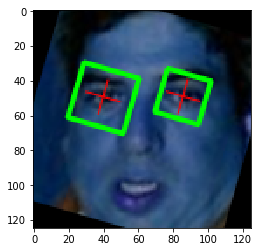

In [51]:
#高さを定義
height = image_face.shape[0]
#幅を定義
width = image_face.shape[1]
#回転の中心を指定                 
center = (int(width/2), int(height/2))

#回転角を指定
theta1=np.arctan(-(centers[0][1]-center[1])/(centers[0][0]-center[0]))*360/(2*np.pi)
theta2=np.arctan( (centers[1][1]-center[1])/(centers[1][0]-center[0]))*360/(2*np.pi)
angle = (theta2-theta1)/2
print(theta1,theta2,angle)
#スケールを指定
scale = 1.0
#getRotationMatrix2D関数を使用
trans = cv2.getRotationMatrix2D(center, angle, scale)
#アフィン変換
image_face_rotated = cv2.warpAffine(image_face, trans, (width,height))

plt.imshow(image_face_rotated)